In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tabulate import tabulate
from scipy.linalg import svd

In [2]:
def show(image):
    """Show an image"""
    img = plt.imshow(image)
    img.set_cmap("gray")
    plt.axis("off")
    plt.show()


def to_gray(image):
    """Convert a four channel image to gray"""
    return cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)


def printf(matrix, decimals=1):
    """Print a formatted matrix"""
    print(tabulate(np.around(matrix, decimals=decimals)))


def print_svd(svd_result):
    U, s, VT = svd_result
    print("=== U ===")
    printf(U)
    print("=== sigma ===")
    printf(np.diag(s))
    print("=== V transpose ===")
    printf(VT)


def product_svd(U, s, VT):
    return np.dot(U, np.dot(np.diag(s), VT))

(15, 15, 4)


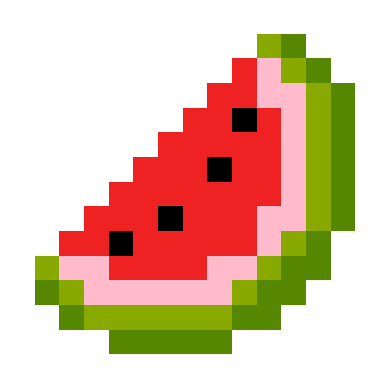

In [18]:
image = imread("images/watermelon.png")
print(image.shape)
show(image)

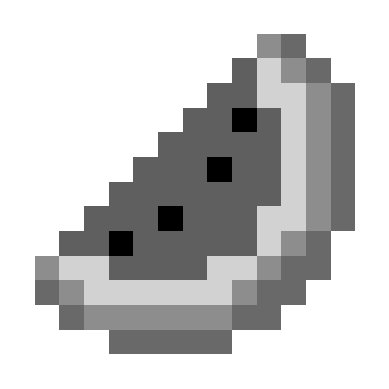

-  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  -
1  1    1    1    1    1    1    1    1    1    1    1    1    1    1
1  1    1    1    1    1    1    1    1    1    0.6  0.4  1    1    1
1  1    1    1    1    1    1    1    1    0.4  0.8  0.6  0.4  1    1
1  1    1    1    1    1    1    1    0.4  0.4  0.8  0.8  0.6  0.4  1
1  1    1    1    1    1    1    0.4  0.4  0    0.4  0.8  0.6  0.4  1
1  1    1    1    1    1    0.4  0.4  0.4  0.4  0.4  0.8  0.6  0.4  1
1  1    1    1    1    0.4  0.4  0.4  0    0.4  0.4  0.8  0.6  0.4  1
1  1    1    1    0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.8  0.6  0.4  1
1  1    1    0.4  0.4  0.4  0    0.4  0.4  0.4  0.8  0.8  0.6  0.4  1
1  1    0.4  0.4  0    0.4  0.4  0.4  0.4  0.4  0.8  0.6  0.4  1    1
1  0.6  0.8  0.8  0.4  0.4  0.4  0.4  0.8  0.8  0.6  0.4  0.4  1    1
1  0.4  0.6  0.8  0.8  0.8  0.8  0.8  0.8  0.6  0.4  0.4  1    1    1
1  1    0.4  0.6  0.6  0.6  0.6  0.6  0.6  0.4  0.4  1    1    1    1
1  1    1    1    0.

In [4]:
image = imread("images/watermelon.png")
image = to_gray(image)
show(image)
printf(image)

In [5]:
U, s, VT = svd(image)
print_svd((U, s, VT))

=== U ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.3  -0     0.2  -0.2  -0.2  -0    -0.2  -0.1  -0    -0.1  -0.1  -0.2   0.3  -0.7
-0.3  -0.4   0     0.2   0.1   0.1  -0.1   0.2   0.6   0.4   0.3   0.2  -0    -0.1  -0
-0.3  -0.2   0.2  -0.3  -0.3   0.4   0    -0    -0.1   0.2  -0.4   0.1   0.5  -0.1  -0
-0.3   0     0.3  -0.1  -0.4  -0.1   0.2   0.4   0    -0.2   0.2  -0.4  -0.2  -0.4   0
-0.2   0.2   0.5  -0.3   0.1  -0     0.2  -0.4  -0    -0.1   0.2   0.5  -0.2  -0    -0
-0.2   0.3   0.3   0.1   0.2   0.1  -0.4  -0.3  -0.3   0.3   0.3  -0.5   0.2   0    -0
-0.2   0.4   0.2   0.2   0.2  -0     0.2   0.5  -0.2   0.3  -0.4   0.2  -0.2   0.2   0
-0.2   0.3  -0     0.1   0.1   0.2   0.2  -0.2   0.6  -0.4  -0.2  -0.3   0.2   0.3   0
-0.2   0.4  -0.2  -0    -0.3   0    -0.7   0.2   0    -0.3   0     0.3  -0    -0.1  -0
-0.2   0.1  -0.4  -0.6  -0.1   0.1   0.2   0.1  -0     0.3   0.3  -0.1  -0.1   0.4   0
-0.2  -0.1  -0.3   0.1   0.2 

In [6]:
def low_rank_approx(svd_result, rank):
    U, s, VT = svd_result

    U_low = np.copy(U)
    U_low = U_low[:, :rank]

    s_low = np.copy(s)
    s_low = s_low[:rank]

    VT_low = np.copy(VT)
    VT_low = VT_low[:rank]

    return U_low, s_low, VT_low

In [7]:
U, s, VT = svd(image)
U_low, s_low, VT_low = low_rank_approx((U, s, VT), 5)
print_svd((U_low, s_low, VT_low))

=== U ===
----  ----  ----  ----  ----
-0.3  -0.3  -0     0.2  -0.2
-0.3  -0.4   0     0.2   0.1
-0.3  -0.2   0.2  -0.3  -0.3
-0.3   0     0.3  -0.1  -0.4
-0.2   0.2   0.5  -0.3   0.1
-0.2   0.3   0.3   0.1   0.2
-0.2   0.4   0.2   0.2   0.2
-0.2   0.3  -0     0.1   0.1
-0.2   0.4  -0.2  -0    -0.3
-0.2   0.1  -0.4  -0.6  -0.1
-0.2  -0.1  -0.3   0.1   0.2
-0.2  -0.3  -0    -0.1   0.5
-0.2   0    -0.2  -0.3   0.4
-0.3   0.2  -0.4   0.4  -0.1
-0.3  -0.3  -0     0.2  -0.2
----  ----  ----  ----  ----
=== sigma ===
----  ---  ---  -  ---
11.7  0    0    0  0
 0    1.9  0    0  0
 0    0    1.8  0  0
 0    0    0    1  0
 0    0    0    0  0.9
----  ---  ---  -  ---
=== V transpose ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.3  -0.3  -0.3  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.3  -0.3
 0.2   0.3   0.3   0.1  -0.1  -0.2  -0.3  -0.3  -0.4  -0.2   0     0.3  -0.1  -0.3   0.2
-0.1  -0     0.1   0.2   0.5   0.4   0.3   

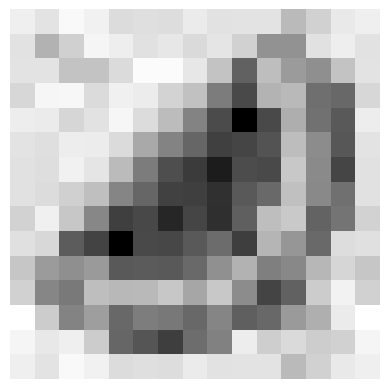

---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
1    1    1.1  1.1  1    1    1    1    1    1    1    0.8  0.9  1    1
1    0.8  0.9  1.1  1    1    1    1    1    0.9  0.6  0.6  1    1    1
1    1    0.9  0.9  1    1.1  1.1  1    0.9  0.4  0.8  0.7  0.6  0.9  1
0.9  1.1  1.1  1    1.1  1    0.9  0.9  0.6  0.3  0.8  0.8  0.5  0.5  0.9
1    1    0.9  1    1.1  1    0.8  0.6  0.3  0    0.3  0.8  0.5  0.4  1
1    1    1    1    1    0.7  0.6  0.5  0.3  0.3  0.4  0.8  0.6  0.4  1
1    1    1.1  1    0.8  0.6  0.4  0.3  0.1  0.3  0.3  0.9  0.6  0.3  1
1    1    0.9  0.8  0.6  0.5  0.3  0.3  0.2  0.4  0.5  0.8  0.6  0.5  1
0.9  1.1  0.9  0.6  0.3  0.3  0.2  0.3  0.2  0.4  0.8  0.9  0.4  0.5  0.9
1    1    0.4  0.3  0    0.3  0.3  0.4  0.5  0.3  0.8  0.7  0.5  1    1
0.9  0.7  0.6  0.7  0.4  0.4  0.4  0.5  0.6  0.8  0.6  0.6  0.8  0.9  0.9
0.9  0.6  0.5  0.8  0.8  0.8  0.9  0.7  0.9  0.6  0.3  0.4  0.9  1.1  0.9
1.1  0.9  0.6  0.7  0.5  0.6  0.5  0.5  0.6  0.4  0.5 

In [19]:
compressed = product_svd(U_low, s_low, VT_low)
show(compressed)
printf(compressed)

In [9]:
def compress(image, rank):
    U, s, VT = svd(image)
    U_low, s_low, VT_low = low_rank_approx((U, s, VT), rank)
    return product_svd(U_low, s_low, VT_low)

=== ( rank = 1 ) ===
@ compression rate : 86.22%   [[ 1 - [(2(1)×15 + (1)) / 15×15] ]]


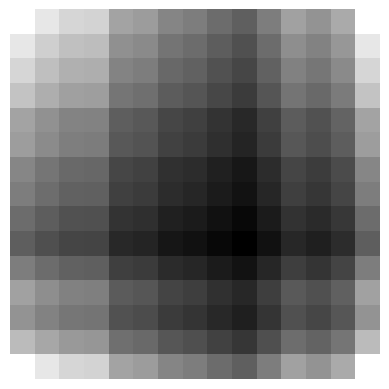

=== ( rank = 2 ) ===
@ compression rate : 72.44%   [[ 1 - [(2(2)×15 + (2)) / 15×15] ]]


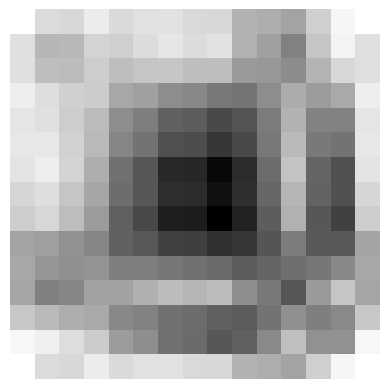

=== ( rank = 3 ) ===
@ compression rate : 58.67%   [[ 1 - [(2(3)×15 + (3)) / 15×15] ]]


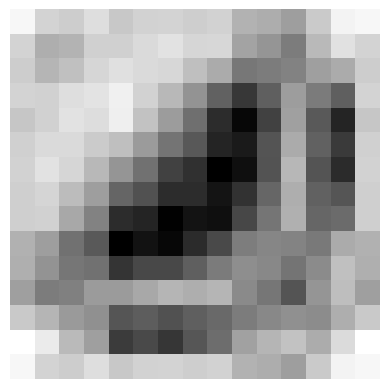

=== ( rank = 5 ) ===
@ compression rate : 31.11%   [[ 1 - [(2(5)×15 + (5)) / 15×15] ]]


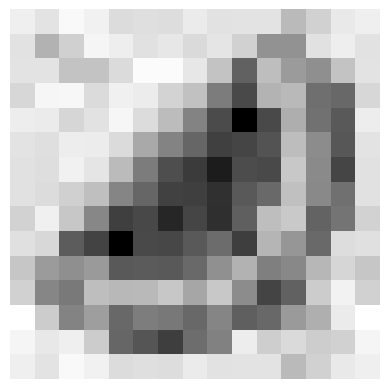

=== ( rank = 10 ) ===
@ compression rate : -37.78%   [[ 1 - [(2(10)×15 + (10)) / 15×15] ]]


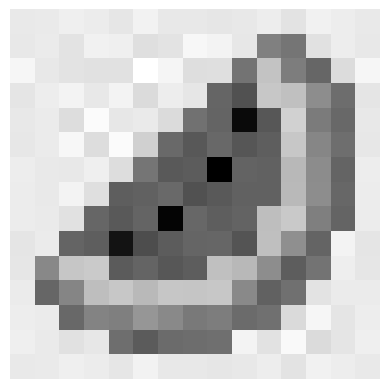

=== ( rank = 12 ) ===
@ compression rate : -65.33%   [[ 1 - [(2(12)×15 + (12)) / 15×15] ]]


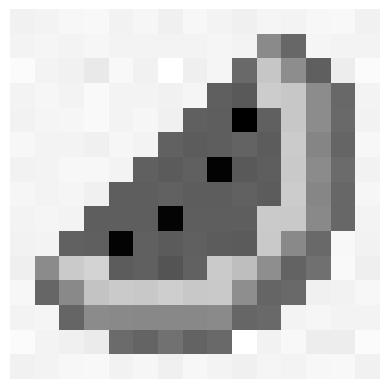

=== ( rank = 13 ) ===
@ compression rate : -79.11%   [[ 1 - [(2(13)×15 + (13)) / 15×15] ]]


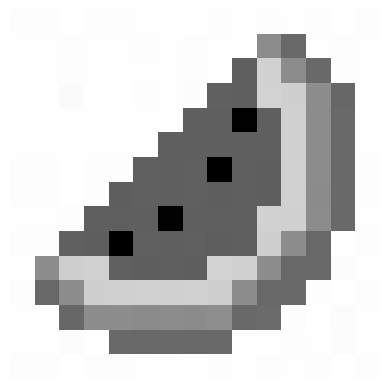

=== ( rank = 15 ) ===
@ compression rate : -106.67%   [[ 1 - [(2(15)×15 + (15)) / 15×15] ]]


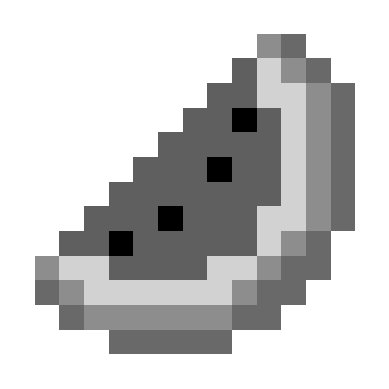

In [10]:
for r in [1, 2, 3, 5, 10, 12, 13, 15]:
    compressed = compress(image, r)
    print(f"=== ( rank = {r} ) ===")
    print(
        f"@ compression rate : {round((1 - (2*r*15+r)/(15*15))*100, 2)}%   [[ 1 - [(2({r})×15 + ({r})) / 15×15] ]]"
    )
    show(compressed)

## Which photo is more compressible?


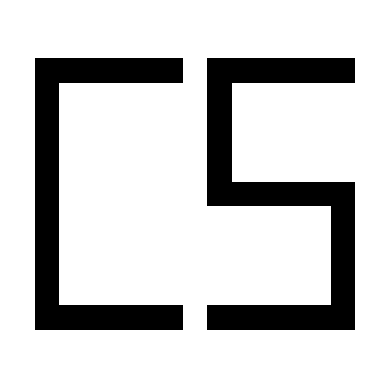

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
1  0  0  0  0  0  0  1  0  0  0  0  0  0  1
1  0  1  1  1  1  1  1  0  1  1  1  1  1  1
1  0  1  1  1  1  1  1  0  1  1  1  1  1  1
1  0  1  1  1  1  1  1  0  1  1  1  1  1  1
1  0  1  1  1  1  1  1  0  1  1  1  1  1  1
1  0  1  1  1  1  1  1  0  0  0  0  0  0  1
1  0  1  1  1  1  1  1  1  1  1  1  1  0  1
1  0  1  1  1  1  1  1  1  1  1  1  1  0  1
1  0  1  1  1  1  1  1  1  1  1  1  1  0  1
1  0  1  1  1  1  1  1  1  1  1  1  1  0  1
1  0  0  0  0  0  0  1  0  0  0  0  0  0  1
1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
=== U ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.2   0    -0.3   0.1   0.9  -0     0    -0.1   0    -0    -0     0    -0     0
-0.3  -0.2  -0    -0.3   0.1  -0.2  -0.3  -0.3   0.7  -0.3   0.1  

In [20]:
image = imread("images/cs.png")
image = to_gray(image)
show(image)
printf(image)
print_svd(svd(image))

=== ( rank = 1 ) ===


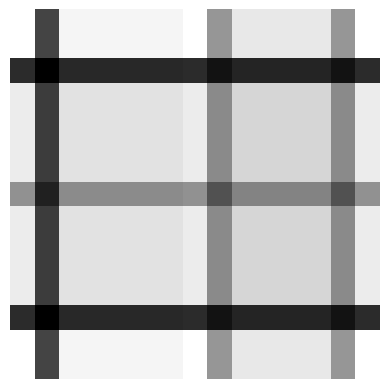

=== ( rank = 3 ) ===


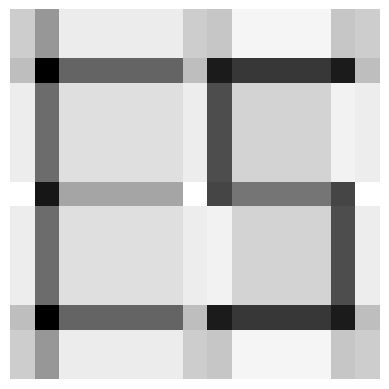

=== ( rank = 4 ) ===


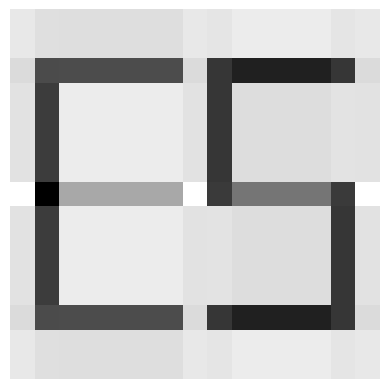

=== ( rank = 5 ) ===


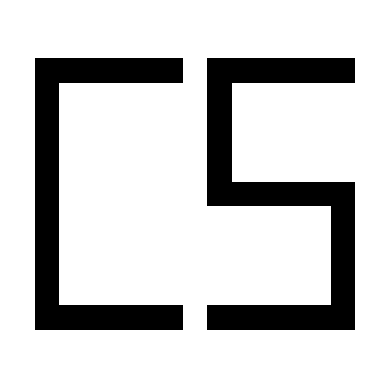

=== ( rank = 10 ) ===


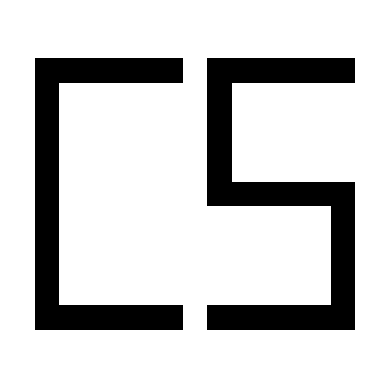

=== ( rank = 15 ) ===


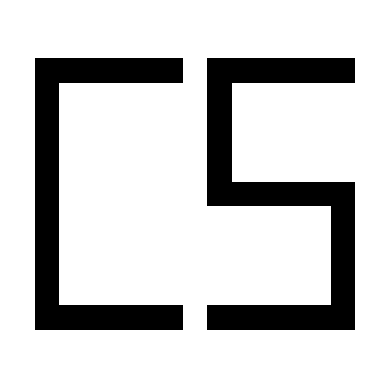

In [12]:
for r in [1, 3, 4, 5, 10, 15]:
    compressed = compress(image, r)
    print(f"=== ( rank = {r} ) ===")
    show(compressed)

## Which images are compressible with rank 1?

- Understanding how SVD works.
- What is pros and cons of svd.
- When does svd work better?


=== ( image 1 ) ===


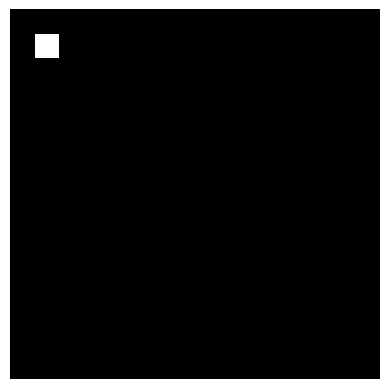

=== ( compressed image 1 with rank 1 ) ===


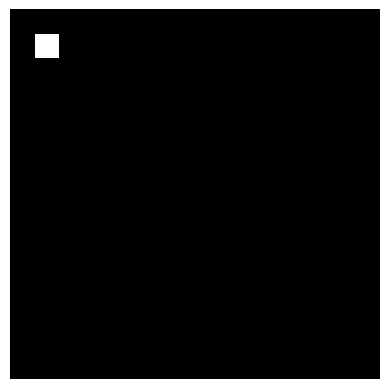

=== ( image 2 ) ===


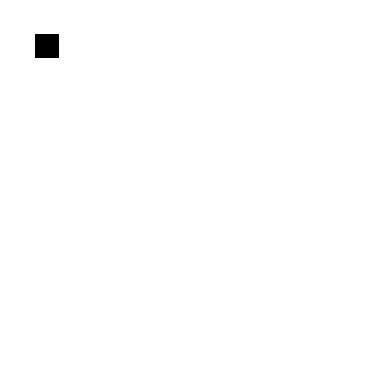

=== ( compressed image 2 with rank 1 ) ===


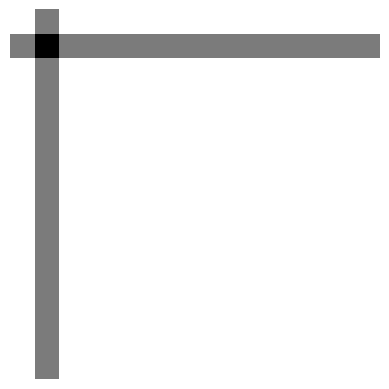

=== ( image 3 ) ===


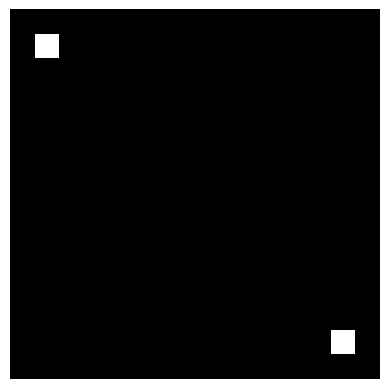

=== ( compressed image 3 with rank 1 ) ===


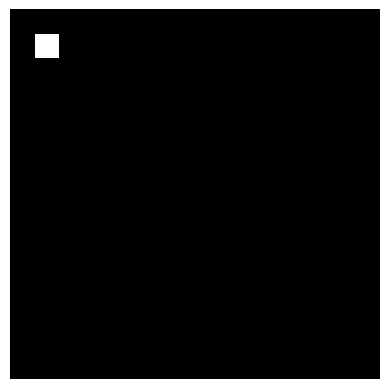

=== ( image 4 ) ===


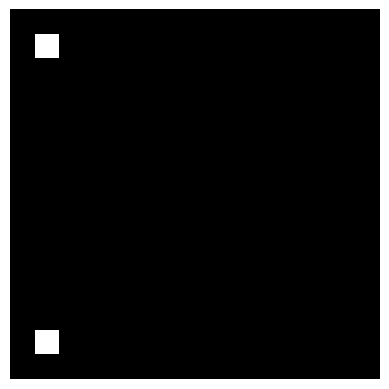

=== ( compressed image 4 with rank 1 ) ===


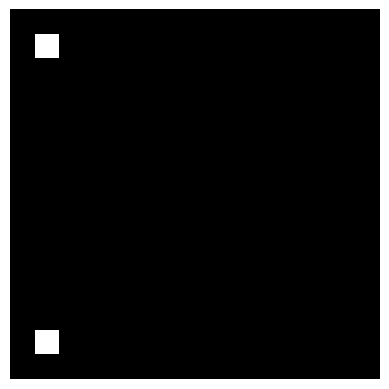

=== ( image 5 ) ===


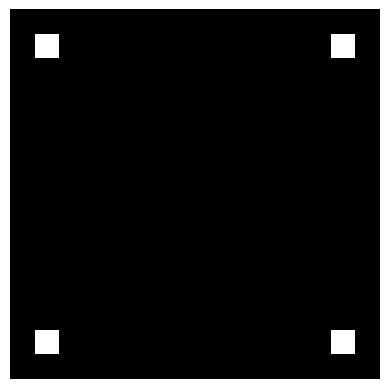

=== ( compressed image 5 with rank 1 ) ===


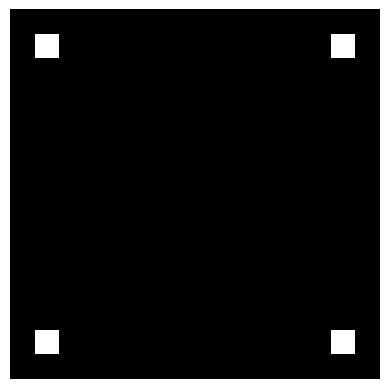

In [13]:
for i in range(5):
    image = to_gray(imread(f"dots/dot{i+1}.png"))
    compressed = compress(image, 1)
    print(f"=== ( image {i+1} ) ===")
    show(image)
    print(f"=== ( compressed image {i+1} with rank 1 ) ===")
    show(compressed)

=== ( image 1 ) ===


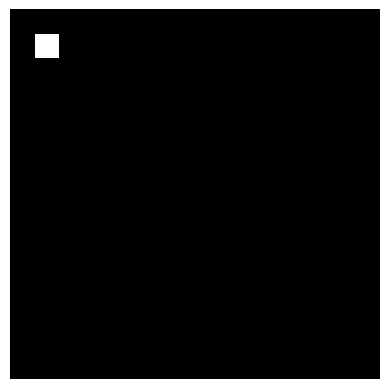

=== approximation rank 1 ===
=== U ===
-
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
-
=== sigma ===
-
1
-
=== V transpose ===
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
=== ( compressed image 1 with rank 1 ) ===


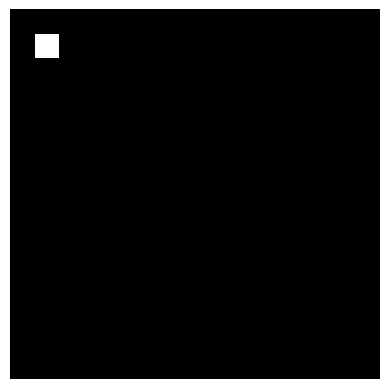

=== ( image 2 ) ===


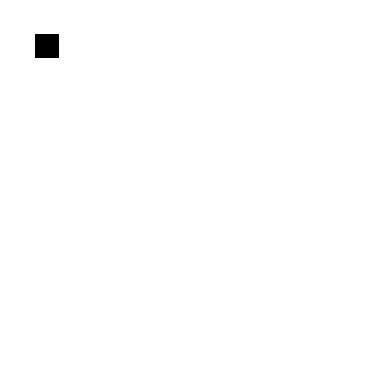

=== approximation rank 1 ===
=== U ===
----
-0.3
-0.2
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
----
=== sigma ===
----
14.9
----
=== V transpose ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.2  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
=== ( compressed image 2 with rank 1 ) ===


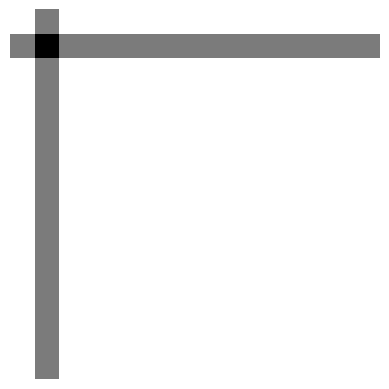

=== ( image 3 ) ===


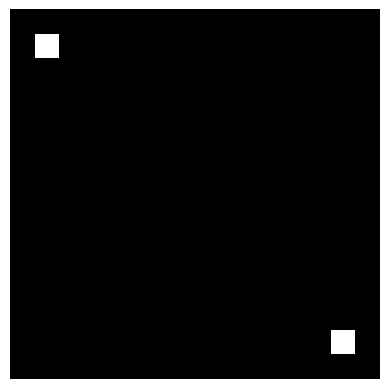

=== approximation rank 1 ===
=== U ===
-
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
-
=== sigma ===
-
1
-
=== V transpose ===
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
=== ( compressed image 3 with rank 1 ) ===


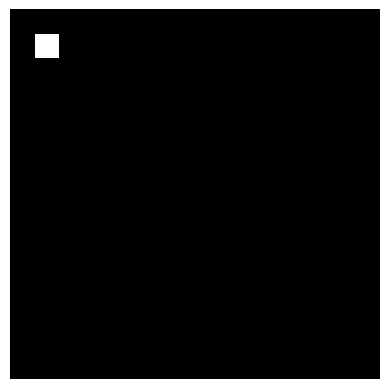

=== ( image 4 ) ===


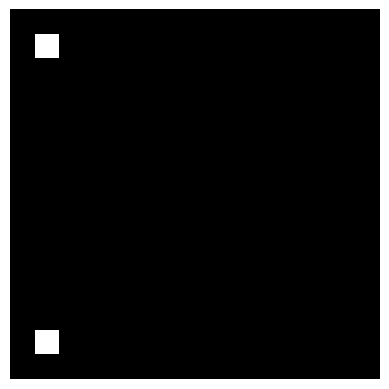

=== approximation rank 1 ===
=== U ===
----
 0
-0.7
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
-0.7
 0
----
=== sigma ===
---
1.4
---
=== V transpose ===
--  --  --  --  --  --  --  --  --  --  --  --  --  --  --
-0  -1  -0  -0  -0  -0  -0  -0  -0  -0  -0  -0  -0  -0  -0
--  --  --  --  --  --  --  --  --  --  --  --  --  --  --
=== ( compressed image 4 with rank 1 ) ===


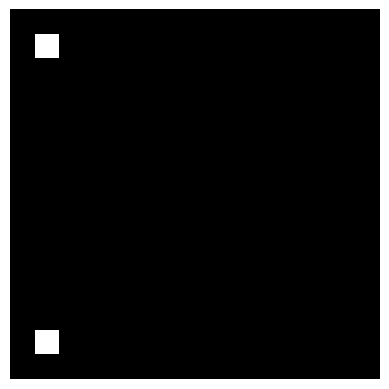

=== ( image 5 ) ===


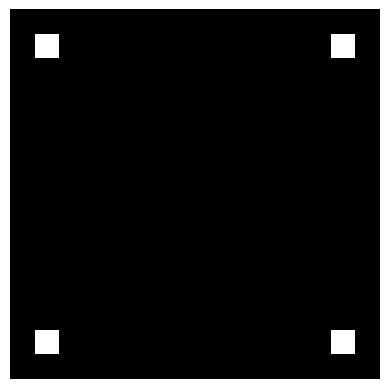

=== approximation rank 1 ===
=== U ===
----
 0
-0.7
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
-0.7
 0
----
=== sigma ===
-
2
-
=== V transpose ===
--  ----  -  -  -  -  -  -  -  -  -  -  -  ----  --
-0  -0.7  0  0  0  0  0  0  0  0  0  0  0  -0.7  -0
--  ----  -  -  -  -  -  -  -  -  -  -  -  ----  --
=== ( compressed image 5 with rank 1 ) ===


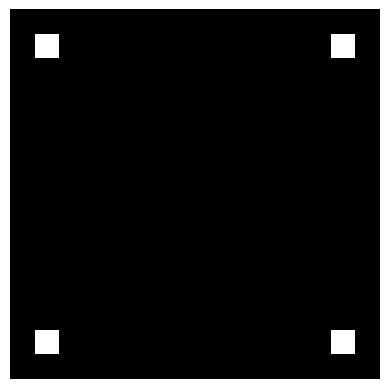

=== ( image 6 ) ===


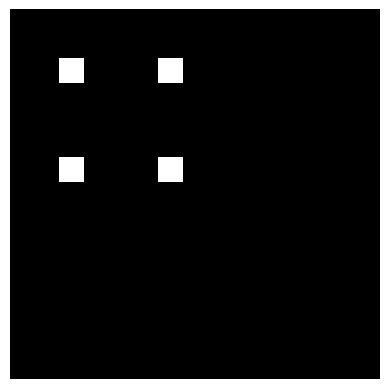

=== approximation rank 1 ===
=== U ===
----
 0
 0
-0.7
 0
 0
 0
-0.7
 0
 0
 0
 0
 0
 0
 0
 0
----
=== sigma ===
-
2
-
=== V transpose ===
--  --  ----  -  -  -  ----  --  --  --  --  --  --  --  --
-0  -0  -0.7  0  0  0  -0.7  -0  -0  -0  -0  -0  -0  -0  -0
--  --  ----  -  -  -  ----  --  --  --  --  --  --  --  --
=== ( compressed image 6 with rank 1 ) ===


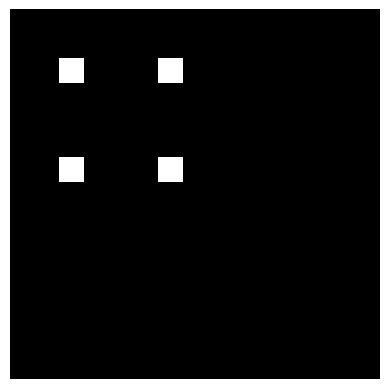

=== ( image 7 ) ===


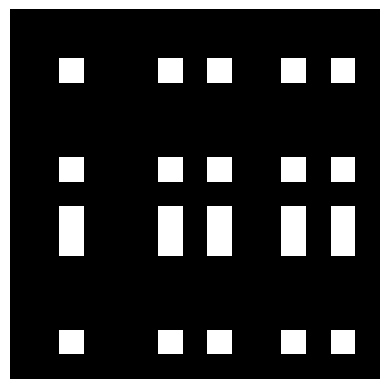

=== approximation rank 1 ===
=== U ===
----
 0
 0
-0.4
 0
 0
 0
-0.4
 0
-0.4
-0.4
 0
 0
 0
-0.4
 0
----
=== sigma ===
-
5
-
=== V transpose ===
--  --  ----  -  -  -  ----  -  ----  -  -  ----  -  ----  --
-0  -0  -0.4  0  0  0  -0.4  0  -0.4  0  0  -0.4  0  -0.4  -0
--  --  ----  -  -  -  ----  -  ----  -  -  ----  -  ----  --
=== ( compressed image 7 with rank 1 ) ===


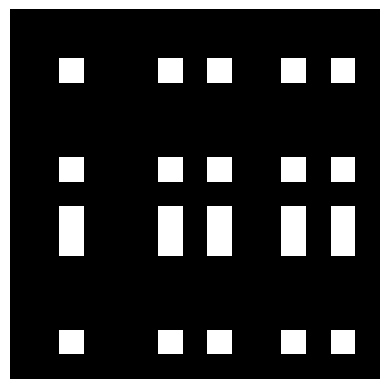

=== ( image 8 ) ===


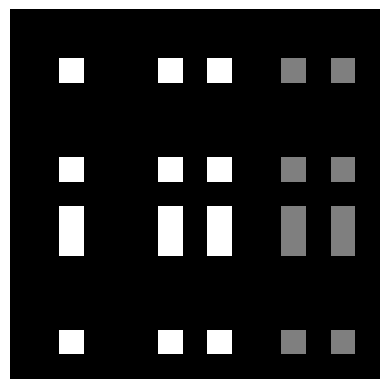

=== approximation rank 1 ===
=== U ===
----
 0
 0
-0.4
 0
 0
 0
-0.4
 0
-0.4
-0.4
 0
 0
 0
-0.4
 0
----
=== sigma ===
---
4.2
---
=== V transpose ===
--  --  ----  -  -  -  ----  -  ----  -  -  ----  -  ----  --
-0  -0  -0.5  0  0  0  -0.5  0  -0.5  0  0  -0.3  0  -0.3  -0
--  --  ----  -  -  -  ----  -  ----  -  -  ----  -  ----  --
=== ( compressed image 8 with rank 1 ) ===


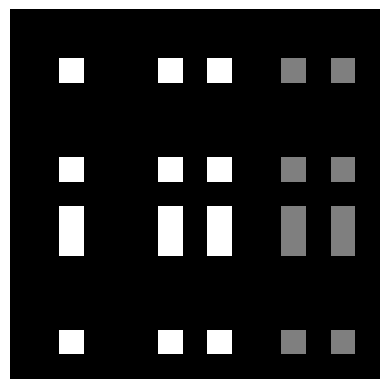

=== ( image 9 ) ===


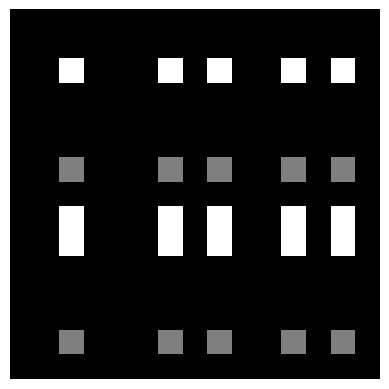

=== approximation rank 1 ===
=== U ===
----
 0
 0
-0.5
 0
 0
 0
-0.3
 0
-0.5
-0.5
 0
 0
 0
-0.3
 0
----
=== sigma ===
---
4.2
---
=== V transpose ===
--  --  ----  -  -  -  ----  -  ----  -  -  ----  -  ----  --
-0  -0  -0.4  0  0  0  -0.4  0  -0.4  0  0  -0.4  0  -0.4  -0
--  --  ----  -  -  -  ----  -  ----  -  -  ----  -  ----  --
=== ( compressed image 9 with rank 1 ) ===


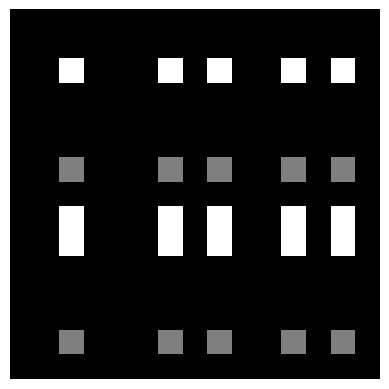

=== ( image 10 ) ===


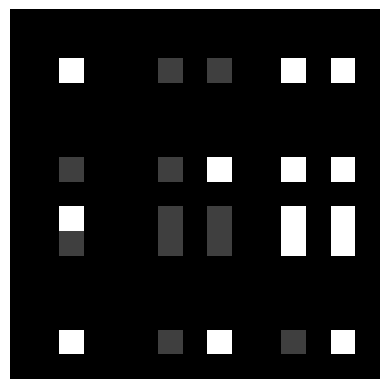

=== approximation rank 1 ===
=== U ===
----
 0
 0
-0.5
 0
 0
 0
-0.5
 0
-0.5
-0.4
 0
 0
 0
-0.4
 0
----
=== sigma ===
---
3.6
---
=== V transpose ===
--  --  ----  -  -  -  ----  -  ----  -  -  ----  -  ----  --
-0  -0  -0.4  0  0  0  -0.2  0  -0.3  0  0  -0.5  0  -0.6  -0
--  --  ----  -  -  -  ----  -  ----  -  -  ----  -  ----  --
=== ( compressed image 10 with rank 1 ) ===


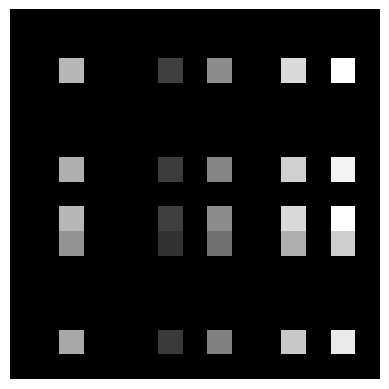

=== ( image 11 ) ===


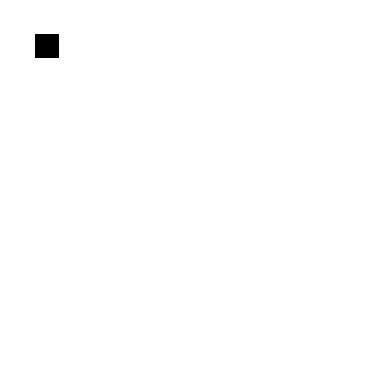

=== approximation rank 1 ===
=== U ===
----
-0.3
-0.2
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
----
=== sigma ===
----
14.9
----
=== V transpose ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.2  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
=== ( compressed image 11 with rank 1 ) ===


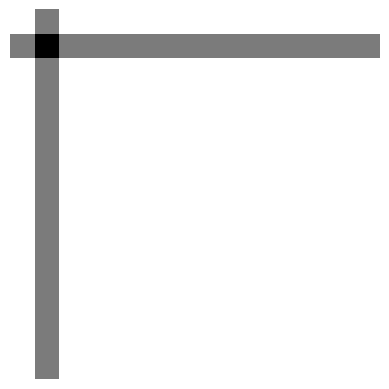

=== ( image 12 ) ===


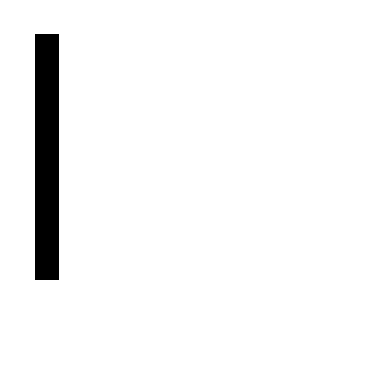

=== approximation rank 1 ===
=== U ===
----
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
----
=== sigma ===
----
14.5
----
=== V transpose ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.1  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
=== ( compressed image 12 with rank 1 ) ===


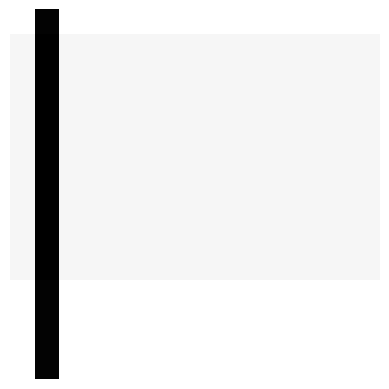

=== matrix of compressed image ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
1.02  0.34  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99
0.99  0.34  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.9

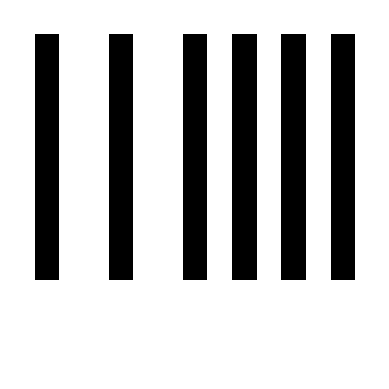

=== approximation rank 1 ===
=== U ===
----
-0.3
-0.2
-0.2
-0.2
-0.2
-0.2
-0.2
-0.2
-0.2
-0.2
-0.2
-0.3
-0.3
-0.3
-0.3
----
=== sigma ===
----
12.1
----
=== V transpose ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.1  -0.3  -0.3  -0.1  -0.3  -0.3  -0.1  -0.3  -0.1  -0.3  -0.1  -0.3  -0.1  -0.3
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
=== ( compressed image 13 with rank 1 ) ===


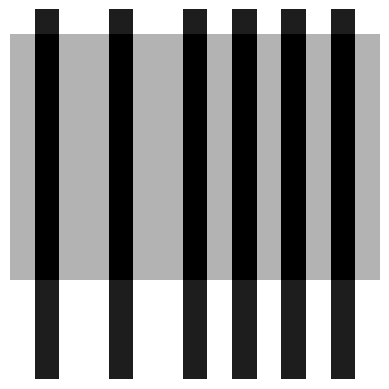

=== matrix of compressed image ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
1.14  0.44  1.14  1.14  0.44  1.14  1.14  0.44  1.14  0.44  1.14  0.44  1.14  0.44  1.14
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.91  0.35  0.91
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.91  0.35  0.91
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.91  0.35  0.91
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.91  0.35  0.91
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.91  0.35  0.91
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.91  0.35  0.91
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.91  0.35  0.91
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.91  0.35  0.91
0.91  0.35  0.91  0.91  0.35  0.91  0.91  0.35  0.91  0.35  0.91  0.35  0.9

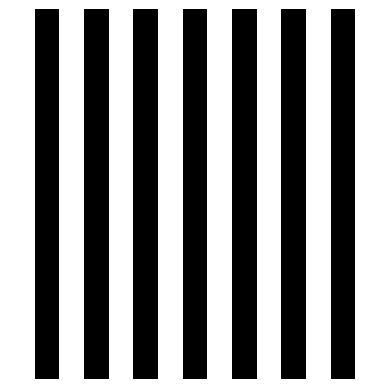

=== approximation rank 1 ===
=== U ===
----
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
-0.3
----
=== sigma ===
--
11
--
=== V transpose ===
----  -  ----  -  ----  -  ----  -  ----  -  ----  -  ----  -  ----
-0.4  0  -0.4  0  -0.4  0  -0.4  0  -0.4  0  -0.4  0  -0.4  0  -0.4
----  -  ----  -  ----  -  ----  -  ----  -  ----  -  ----  -  ----
=== ( compressed image 14 with rank 1 ) ===


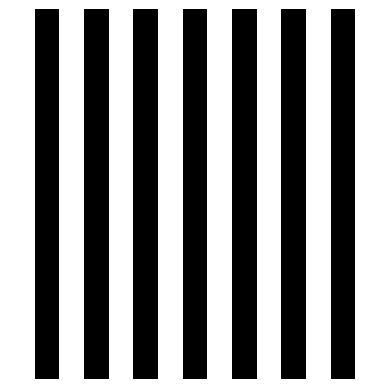

=== matrix of compressed image ===
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
=== ( image 15 ) ===


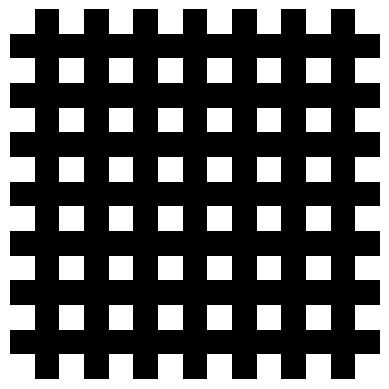

=== approximation rank 1 ===
=== U ===
----
-0.4
 0
-0.4
 0
-0.4
 0
-0.4
 0
-0.4
 0
-0.4
 0
-0.4
 0
-0.4
----
=== sigma ===
-
8
-
=== V transpose ===
----  -  ----  -  ----  -  ----  -  ----  -  ----  -  ----  -  ----
-0.4  0  -0.4  0  -0.4  0  -0.4  0  -0.4  0  -0.4  0  -0.4  0  -0.4
----  -  ----  -  ----  -  ----  -  ----  -  ----  -  ----  -  ----
=== ( compressed image 15 with rank 1 ) ===


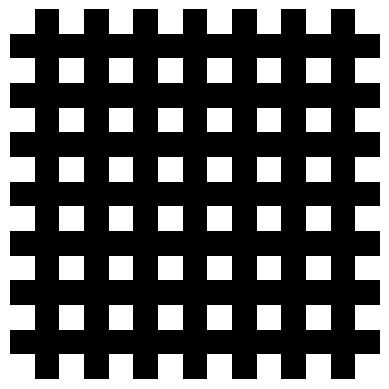

=== ( image 16 ) ===


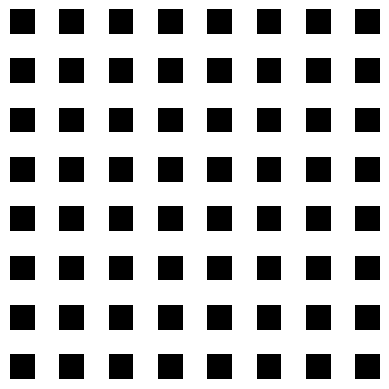

=== approximation rank 1 ===
=== U ===
----
-0.2
-0.3
-0.2
-0.3
-0.2
-0.3
-0.2
-0.3
-0.2
-0.3
-0.2
-0.3
-0.2
-0.3
-0.2
----
=== sigma ===
----
11.8
----
=== V transpose ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
=== ( compressed image 16 with rank 1 ) ===


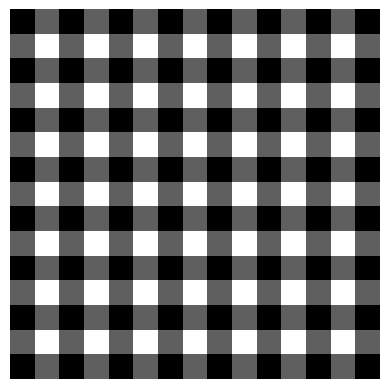

=== ( image 17 ) ===


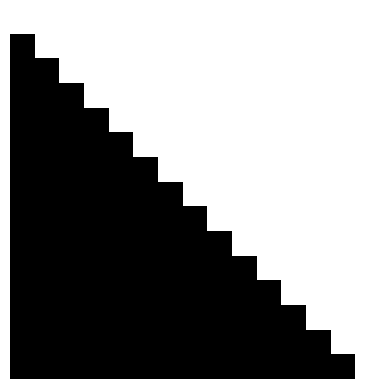

=== approximation rank 1 ===
=== U ===
---
0.4
0.4
0.3
0.3
0.3
0.3
0.3
0.3
0.2
0.2
0.2
0.1
0.1
0.1
0
---
=== sigma ===
---
9.9
---
=== V transpose ===
-  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
0  0.1  0.1  0.1  0.2  0.2  0.2  0.3  0.3  0.3  0.3  0.3  0.3  0.4  0.4
-  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
=== ( compressed image 17 with rank 1 ) ===


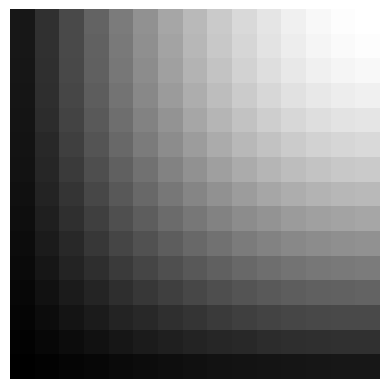

=== ( image 18 ) ===


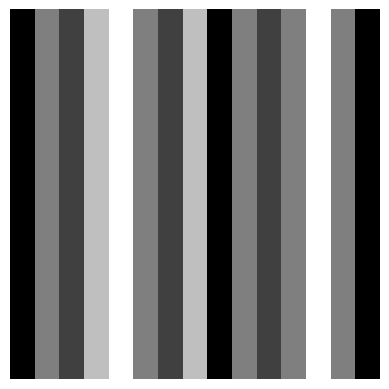

=== approximation rank 1 ===
=== U ===
---
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
---
=== sigma ===
---
8.3
---
=== V transpose ===
-  ---  ---  ---  ---  ---  ---  ---  -  ---  ---  ---  ---  ---  -
0  0.2  0.1  0.4  0.5  0.2  0.1  0.4  0  0.2  0.1  0.2  0.5  0.2  0
-  ---  ---  ---  ---  ---  ---  ---  -  ---  ---  ---  ---  ---  -
=== ( compressed image 18 with rank 1 ) ===


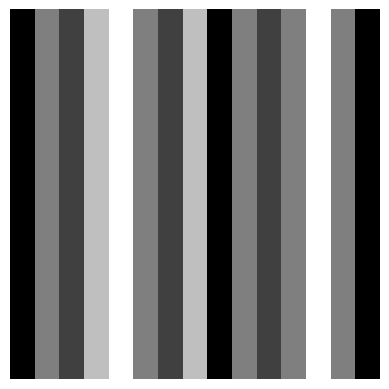

In [14]:
print_matrix_of_compressed = [11, 12, 13]

for i in range(18):
    image = to_gray(imread(f"dots/dot{i+1}.png"))
    compressed = compress(image, 1)
    print(f"=== ( image {i+1} ) ===")
    show(image)
    print("=== approximation rank 1 ===")
    print_svd(low_rank_approx(svd(image), 1))
    print(f"=== ( compressed image {i+1} with rank 1 ) ===")
    show(compressed)
    if i in print_matrix_of_compressed:
        print("=== matrix of compressed image ===")
        printf(compressed, 2)

## Which images are compressible with rank 2

- which images are compressible with rank 3, 4, ...
- you can explore to gain a better grasp of svd


=== image ===


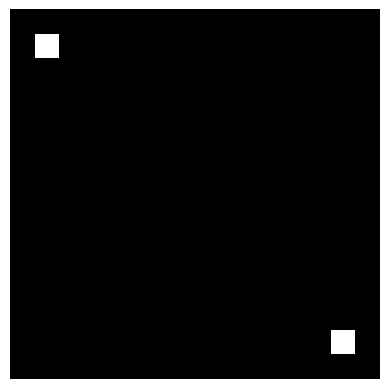

=== compressed image ===


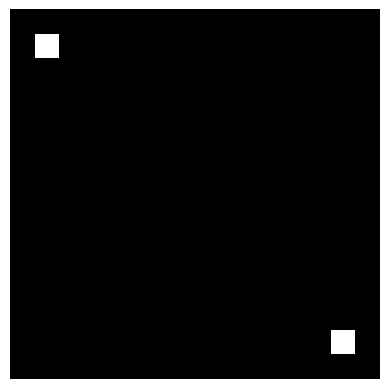

=== U ===
-  -
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  1
0  0
-  -
=== sigma ===
-  -
1  0
0  1
-  -
=== V transpose ===
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -
=== image ===


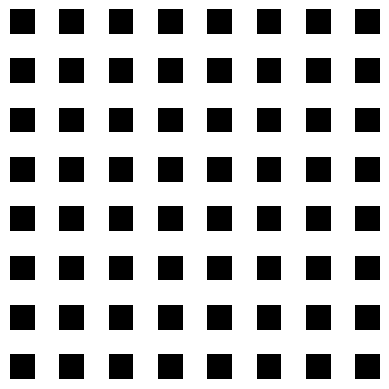

=== compressed image ===


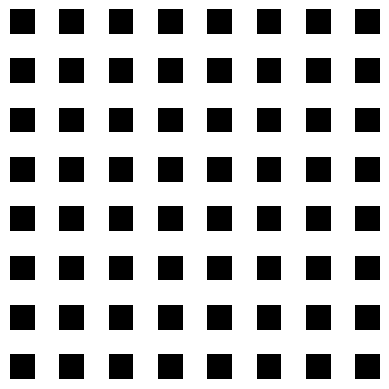

=== U ===
----  ----
-0.2   0.3
-0.3  -0.2
-0.2   0.3
-0.3  -0.2
-0.2   0.3
-0.3  -0.2
-0.2   0.3
-0.3  -0.2
-0.2   0.3
-0.3  -0.2
-0.2   0.3
-0.3  -0.2
-0.2   0.3
-0.3  -0.2
-0.2   0.3
----  ----
=== sigma ===
----  ---
11.8  0
 0    4.8
----  ---
=== V transpose ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2  -0.3  -0.2
-0.3   0.2  -0.3   0.2  -0.3   0.2  -0.3   0.2  -0.3   0.2  -0.3   0.2  -0.3   0.2  -0.3
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
=== image ===


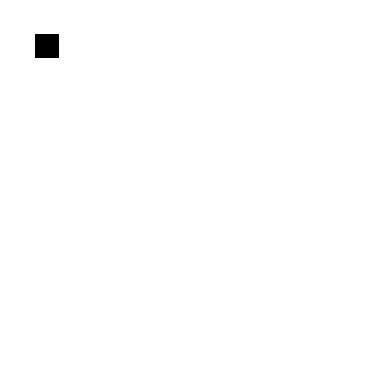

=== compressed image ===


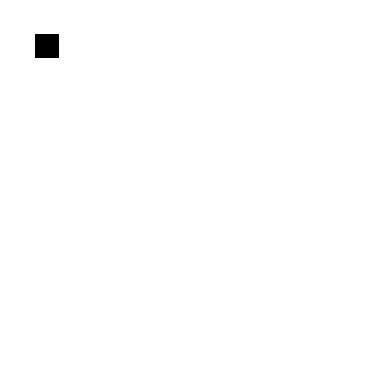

=== U ===
----  ----
-0.3   0.1
-0.2  -1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
-0.3   0.1
----  ----
=== sigma ===
----  ---
14.9  0
 0    0.9
----  ---
=== V transpose ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.2  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3  -0.3
-0.1   1    -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
=== image ===


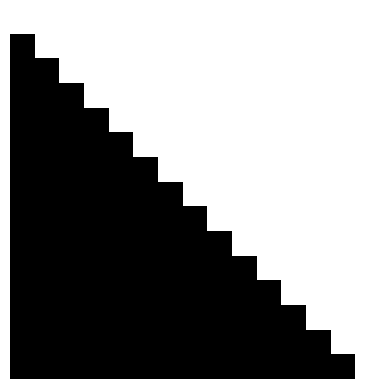

=== compressed image ===


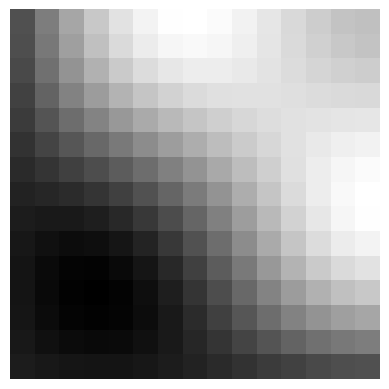

=== U ===
---  ----
0.4   0.4
0.4   0.3
0.3   0.3
0.3   0.2
0.3   0.1
0.3  -0
0.3  -0.1
0.3  -0.2
0.2  -0.3
0.2  -0.3
0.2  -0.4
0.1  -0.3
0.1  -0.3
0.1  -0.2
0    -0.1
---  ----
=== sigma ===
---  ---
9.9  0
0    3.3
---  ---
=== V transpose ===
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ----  ----  ----  ----  ----
0    0.1  0.1  0.1  0.2  0.2  0.2  0.3  0.3  0.3   0.3   0.3   0.3   0.4   0.4
0.1  0.2  0.3  0.3  0.4  0.3  0.3  0.2  0.1  0    -0.1  -0.2  -0.3  -0.3  -0.4
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ----  ----  ----  ----  ----


In [15]:
for i in [3, 16, 2, 17]:
    image = to_gray(imread(f"dots/dot{i}.png"))
    compressed = compress(image, 2)
    print("=== image ===")
    show(image)
    print("=== compressed image ===")
    show(compressed)
    print_svd(low_rank_approx(svd(image), 2))

## Compressing High resolution images
* some images are more compressible.

In [16]:
import os

=== original image ===


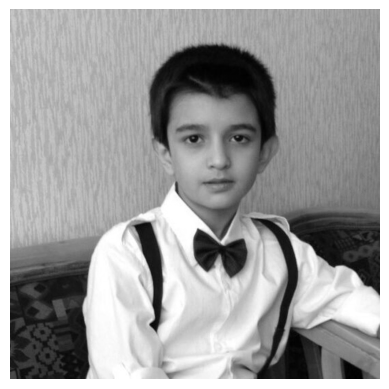

=== rank : 15 ===
@ compression rate : 95.31%


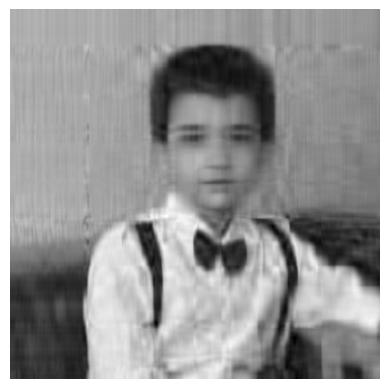

=== rank : 50 ===
@ compression rate : 84.36%


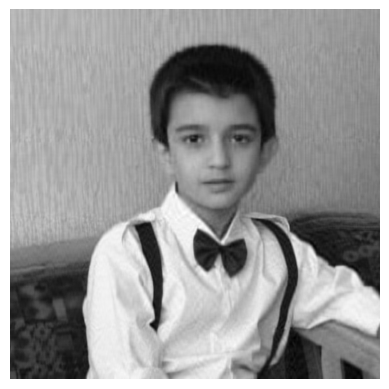

=== rank : 100 ===
@ compression rate : 68.73%


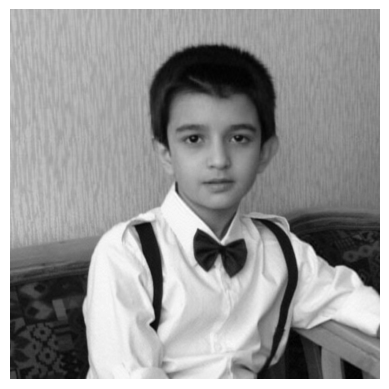

=== rank : 200 ===
@ compression rate : 37.45%


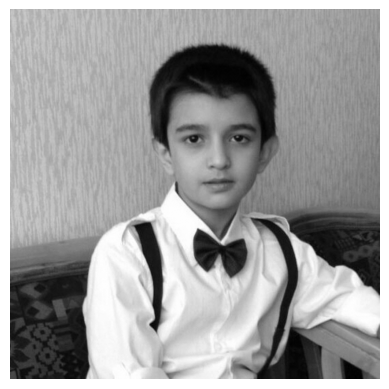

=== original image ===


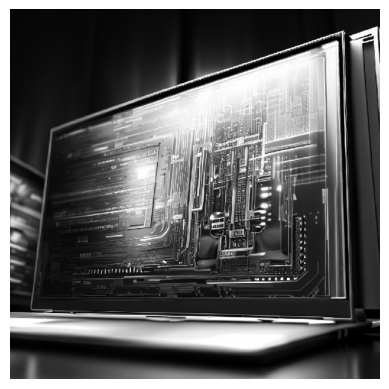

=== rank : 15 ===
@ compression rate : 95.31%


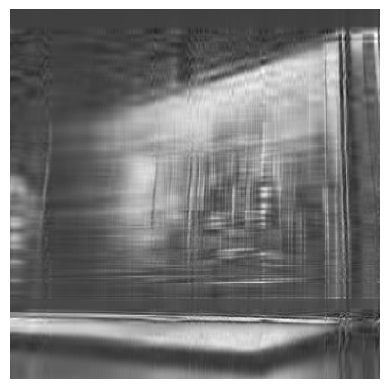

=== rank : 50 ===
@ compression rate : 84.36%


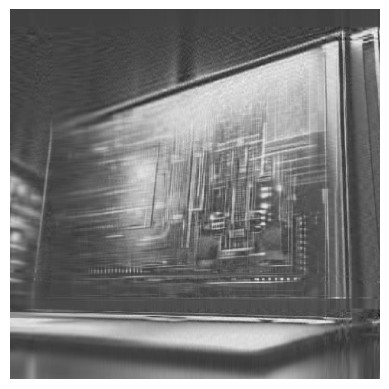

=== rank : 100 ===
@ compression rate : 68.73%


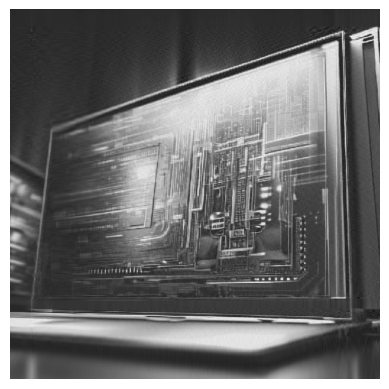

=== rank : 200 ===
@ compression rate : 37.45%


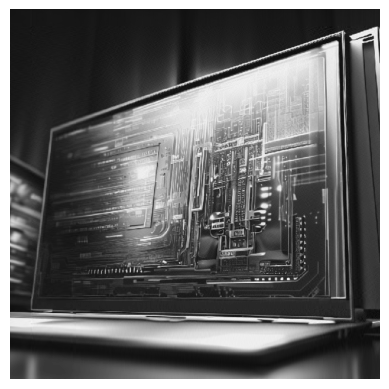

=== original image ===


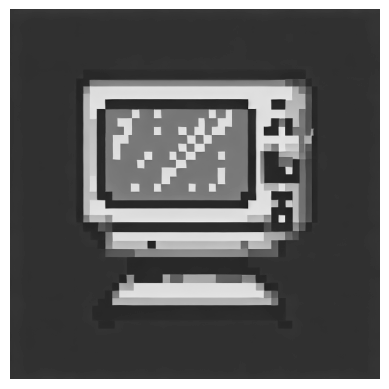

=== rank : 15 ===
@ compression rate : 95.31%


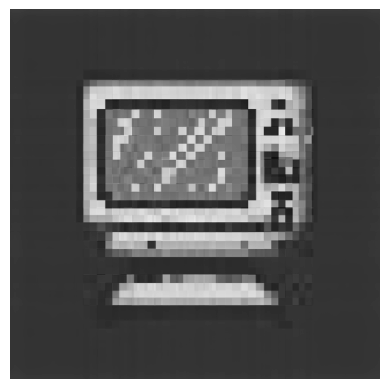

=== rank : 50 ===
@ compression rate : 84.36%


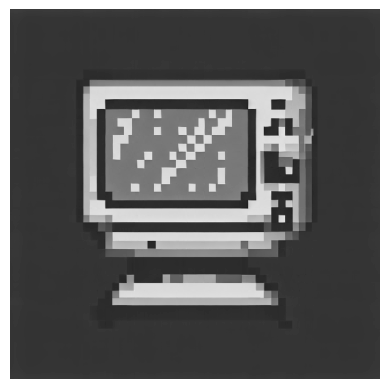

=== rank : 100 ===
@ compression rate : 68.73%


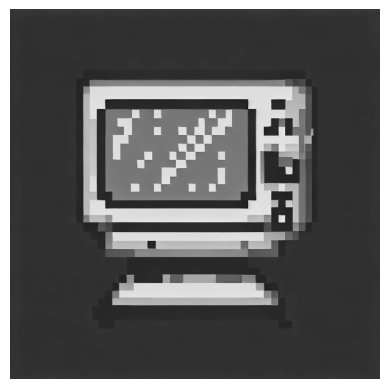

=== rank : 200 ===
@ compression rate : 37.45%


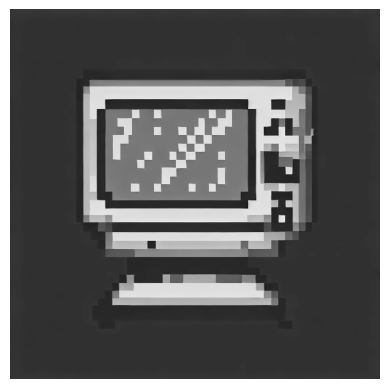

=== original image ===


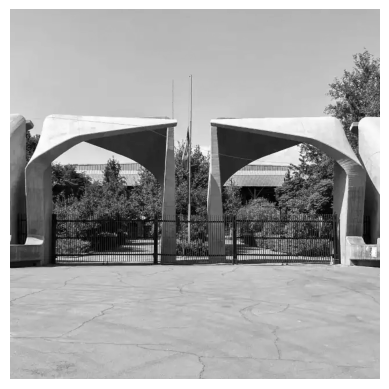

=== rank : 15 ===
@ compression rate : 95.31%


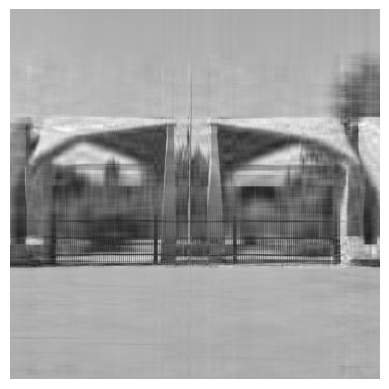

=== rank : 50 ===
@ compression rate : 84.36%


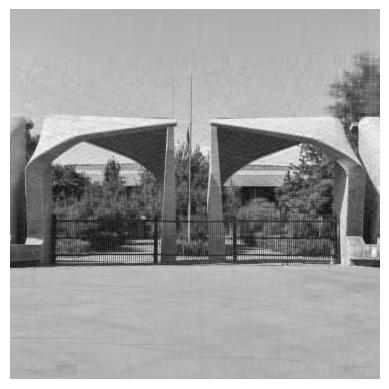

=== rank : 100 ===
@ compression rate : 68.73%


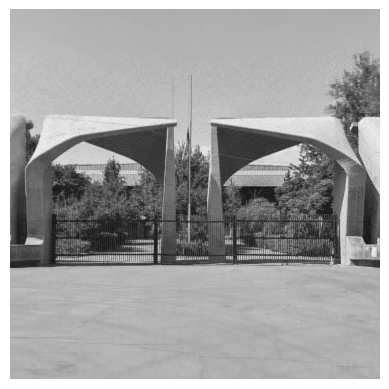

=== rank : 200 ===
@ compression rate : 37.45%


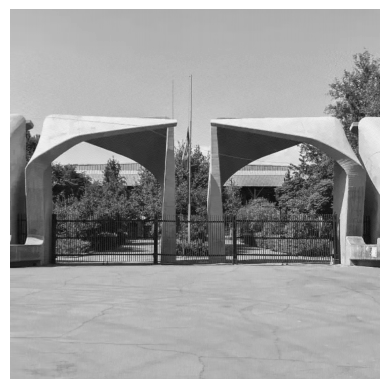

In [17]:
for file in os.scandir("640x640"):
    image = to_gray(imread(file.path))
    print("=== original image ===")
    show(image)
    for r in [15, 50, 100, 200]:
        print(f"=== rank : {r} ===")
        print(f"@ compression rate : {round((1 - (640*r*2+r)/(640*640))*100, 2)}%")
        show(compress(image, r))